<a href="https://colab.research.google.com/github/JumanaFM/JumanaFM/blob/master/Day_1_Bits_and_Qubits_participant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Quantum Computing Tutorial** — From Bits to Qubits 🚀

Welcome to this hands-on tutorial on building and understanding a **quantum circuits** using Qiskit!  

In this notebook, we'll start from the **basics of quantum circuits** and gradually move toward creating a **fully functional quantum full adder** step by step.


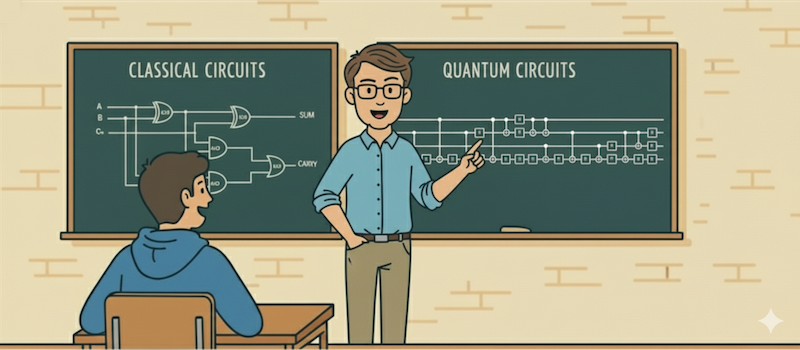

## ⚙️ Environment Setup

### **Installing Packages**
Before we begin coding, we need to make sure that the required libraries are installed.  
We'll use:

- **Qiskit** → the main framework for building and simulating quantum circuits.  
- **Qiskit Aer** → the simulator backend used to run and test quantum circuits.  
- **Pylatexenc** → for properly rendering circuit diagrams.

Run the following cell to install all required packages 👇


In [ ]:
!pip install qiskit qiskit-aer pylatexenc -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 88.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 103.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.9 MB/s eta 0:00:00


### **Importing the Required Libraries**

Now that our environment is ready, let's import all the modules we'll need throughout this tutorial.


In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Operator

from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import UnrollCustomDefinitions, BasisTranslator
from qiskit.circuit.equivalence_library import SessionEquivalenceLibrary as SEL

from math import pi
import numpy as np
import matplotlib.pyplot as plt

backend = AerSimulator()


## ⚡ **Creating Our First Quantum Circuit**

A **quantum circuit** is a model for quantum computation in which the computation is performed by applying a sequence of **quantum gates** to **qubits**. Each gate represents a specific quantum operation — similar to logic gates in classical computing, but acting on quantum states.

In this step, we create a **single-qubit circuit** — just one quantum wire with no gates applied yet.  
At this stage, **nothing happens**; the qubit simply stays in its initial state |0⟩.

Let’s take a look 👇



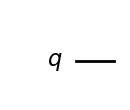

In [ ]:
q = QuantumRegister(1,'q')
qc = QuantumCircuit(q)
qc.draw('mpl')

### **Visualizing the Qubit State** — The Bloch Sphere

This is the **Bloch Sphere**, a powerful visualization tool used to represent the state of a single qubit.

In the figure above, the arrow points straight to the **top**, which corresponds to the **|0⟩ state** — the qubit’s default **ground state**.  
Since we haven’t applied any gates yet, the qubit remains in this initial position.

Later, as we apply different quantum gates, we’ll see this arrow **rotate and move** around the sphere, representing changes in the qubit’s state.



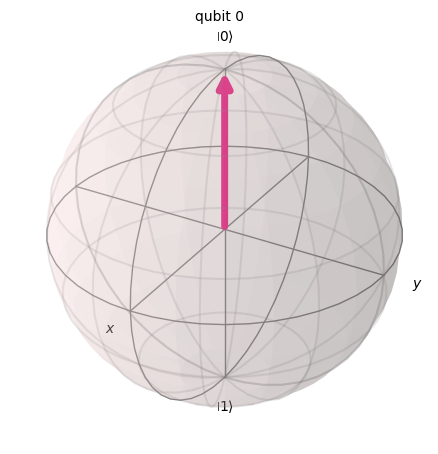

In [ ]:
statevector = Statevector(qc)
plot_bloch_multivector(statevector)

### **Creating a Combined Visualization Function**

To make our exploration easier, let’s create a **helper function** that displays both:

1. The **quantum circuit diagram**, and  
2. Its corresponding **Bloch Sphere representation**  

— side by side in a single figure.

This function, `plot_circuit_sphere(qc)`, will take any quantum circuit as input,  
generate its **statevector**, and visualize both views together for quick comparison.  
We’ll use this to better understand how each gate affects the qubit’s state.


In [ ]:
def plot_circuit_sphere(qc):
    sv = Statevector(qc)

    # make right subplot (Bloch sphere) twice as wide as the left
    fig, axes = plt.subplots(
        1, 2,
        figsize=(12, 4),
        gridspec_kw={'width_ratios': [1, 2]}
    )

    qc.draw('mpl', ax=axes[0])
    axes[0].set_title('Quantum Circuit')

    bloch_fig = plot_bloch_multivector(sv)
    bloch_fig.canvas.draw()
    img = np.asarray(bloch_fig.canvas.buffer_rgba())
    plt.close(bloch_fig)

    axes[1].imshow(img)
    axes[1].axis('off')
    axes[1].set_title('Bloch Sphere')

    plt.tight_layout()
    plt.show()

## **Applying Different Gate**

### **The X Gate**

Now let’s apply our **first quantum gate** — the **X gate** (also called the **NOT gate**).

The X gate flips the state of the qubit:  
it changes **|0⟩ → |1⟩** and **|1⟩ → |0⟩**, just like a classical NOT operation.

In the circuit below, you’ll see a single **X gate** applied to our qubit wire.


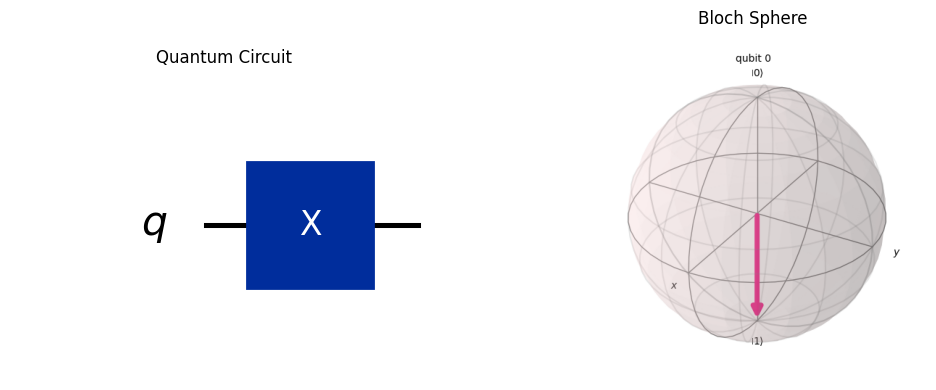

In [ ]:
q = QuantumRegister(1,'q')
qc = QuantumCircuit(q)
qc.x(q)

plot_circuit_sphere(qc)

Note thar on the Bloch Sphere, the arrow now points **downward** toward the **|1⟩** position —  
this means our qubit has been flipped from its ground state **|0⟩** to the **excited state |1⟩**.

This is the quantum version of flipping a classical bit from 0 to 1.


### **The H (Hadamard) Gate**

Now we add the **Hadamard gate (H gate)** to our single qubit.

The **H gate** places the qubit into a **superposition state**, meaning it’s now **equally likely** to be measured as **|0⟩ or |1⟩**.  

On the **Bloch Sphere**, this corresponds to moving the qubit’s state to the **equator**, halfway between the Z-axis states |0⟩ and |1⟩.  
This is one of the fundamental operations that gives quantum computers their unique power.


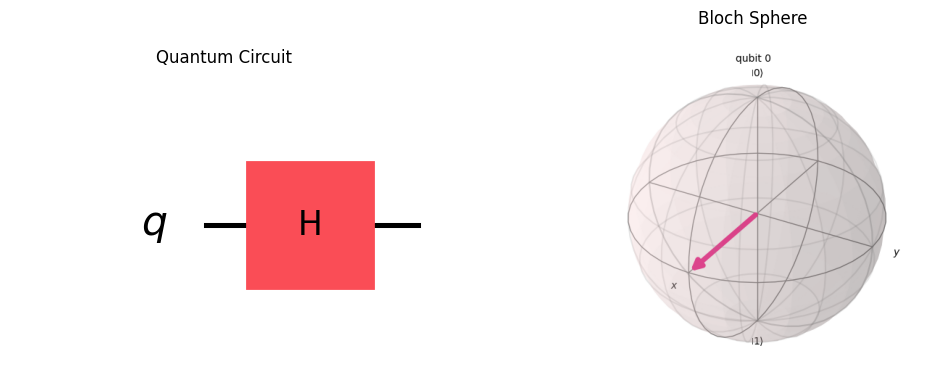

In [ ]:
# Let's do an H-gate on a |0> qubit
q = QuantumRegister(1,'q')
qc = QuantumCircuit(q)

qc.h(q)

plot_circuit_sphere(qc)

### **The Z Gate — Phase Flip**

Now we add another gate to our circuit — the **Z gate**, applied after the **H gate**.

The **Z gate** performs a **180° rotation around the Z-axis**, which **changes the phase** of the qubit’s state.  
On the **Bloch Sphere**, you’ll notice the arrow rotates around the vertical axis —  
this affects the **direction** of the state vector but **does not change** the probability of measuring |0⟩ or |1⟩.

In other words, the Z gate alters the **phase** but not the **measurment probability** of the superposition.


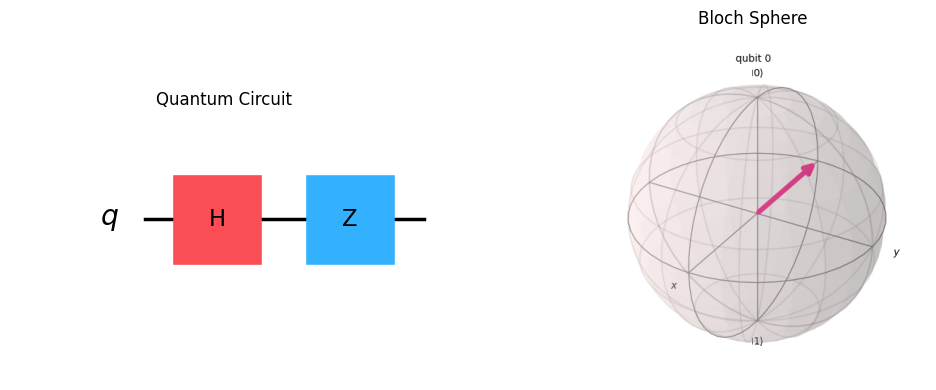

In [ ]:
qc.z(q)

plot_circuit_sphere(qc)

### **Combining Gates** — H → Z → H

Let’s now apply another **H gate** to our qubit.  
We’ve already applied **H** and then **Z**, so our sequence is now:

**H → Z → H**

What do you think will happen when we add this final H gate?  
Let’s run it and see how the qubit behaves on the Bloch sphere 👇


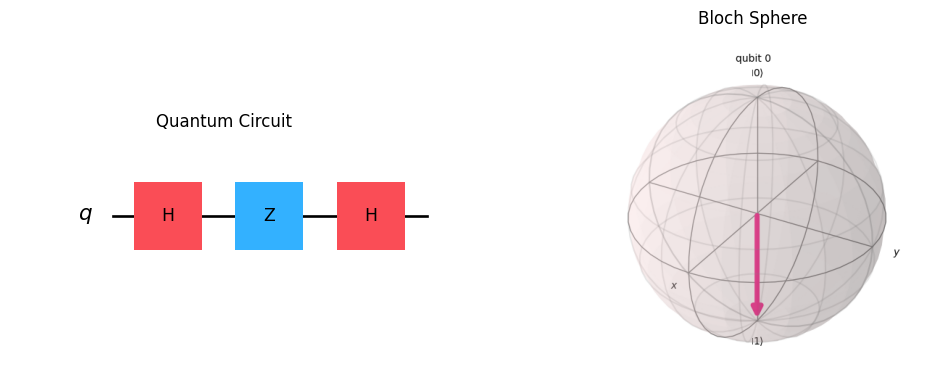

In [ ]:
qc.h(q)

plot_circuit_sphere(qc)

### **What Just Happened?**

If you look at the Bloch Sphere, the qubit now points **downward** — exactly the same result we saw earlier when applying a single **X gate**.  

This means that the sequence **H → Z → H** is **functionally equivalent to X**.

By recognizing such relationships, we can **simplify quantum circuits** — replacing longer gate sequences with shorter, equivalent ones.  
This is a crucial skill in **quantum circuit optimization**, especially when working with **noisy gates** on real hardware,  
where every extra operation can introduce **errors** or **decoherence**.

Understanding these equivalences helps you design **cleaner**, **more efficient**, and **less error-prone** quantum programs.


## **From Pictures to Proofs** — What Does “Equivalent” Mean?

So far we used the Bloch sphere to build intuition. To **certify** equivalence we need algebra. In the next cell we’ll extract the matrix of a simple circuit and print it explicitly.

### **Circuits as Matrices** — The Algebra Behind Quantum Operations

Qantum circuits, no matter how complex, can ultimately be represented by a **unitary matrix** $U$.

To move from intuition to mathematics, let’s see how to **extract the matrix representation** of a circuit directly from Qiskit.

In [ ]:
circuit = QuantumCircuit(1)

circuit.h(0)

U = Operator(circuit)

print(U.data)

[[ 0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j]]


### **Visualizing the Matrix**

Printing numbers is informative but not very intuitive. Let’s define a small **helper function** that visualizes any circuit side by side with its  
**real** and **imaginary** matrix components, giving us an immediate sense of structure.

In [ ]:
def plot_circuit_unitary_heatmap(circuit, figsize=(9, 3), dpi=140, fontsize=8):
    """
    Display a quantum circuit alongside heatmaps of the real and imaginary parts
    of its unitary matrix, with adaptive text color.
    """
    circ_nom = circuit.remove_final_measurements(inplace=False)
    U = Operator(circ_nom).data

    fig, axes = plt.subplots(1, 3, figsize=figsize, dpi=dpi, gridspec_kw={'width_ratios': [3, 2, 2]})
    circuit.draw('mpl', ax=axes[0])
    axes[0].set_title("Circuit")

    titles = ['Real(U)', 'Imag(U)']
    parts = [np.real(U), np.imag(U)]

    for ax, part, title in zip(axes[1:], parts, titles):
        im = ax.imshow(part, cmap='RdBu', vmin=-0.8, vmax=0.8)  # narrower range
        ax.set_title(title)
        ax.set_xticks(range(U.shape[1]))
        ax.set_yticks(range(U.shape[0]))
        ax.set_xlabel('Column')
        ax.set_ylabel('Row')

        # Annotate each cell with adaptive text color
        for i in range(U.shape[0]):
            for j in range(U.shape[1]):
                val = part[i, j]
                color = 'white' if abs(val) > 0.4 else 'black'  # contrast heuristic
                ax.text(j, i, f'{val:+.2f}', ha='center', va='center',
                        color=color, fontsize=fontsize, fontweight='bold')

        plt.colorbar(im, ax=ax, fraction=0.046)

    plt.tight_layout()
    plt.show()


### **Putting It to Use** — Comparing $HZH$ with $X$

Now that we have our visualization tool, let’s use it to **compare two circuits** directly.

We’ll look at:

- **Circuit A:** a single **X gate**, and  
- **Circuit B:** the composite sequence **H → Z → H**.

If both circuits are equivalent, their **unitary matrices should look identical** when visualized side by side.

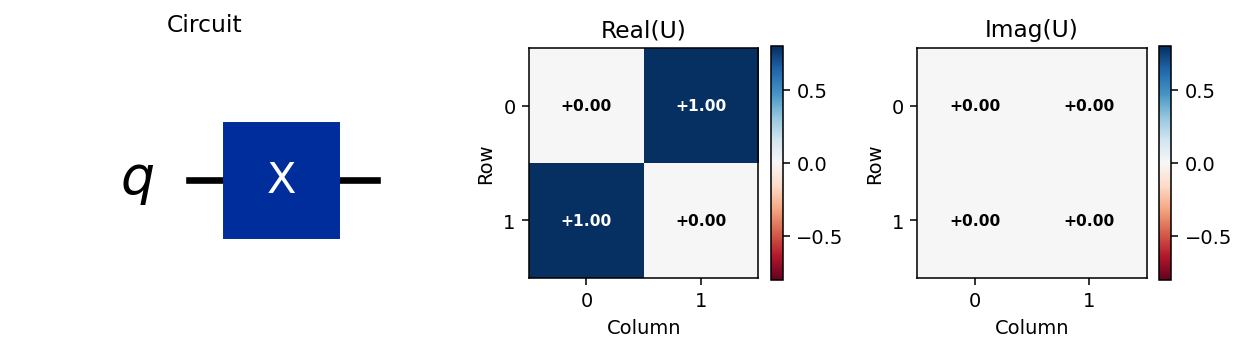

In [ ]:
circuitA = QuantumCircuit(1, name = 'Circuit A')
circuitA.x(0)

plot_circuit_unitary_heatmap(circuitA)

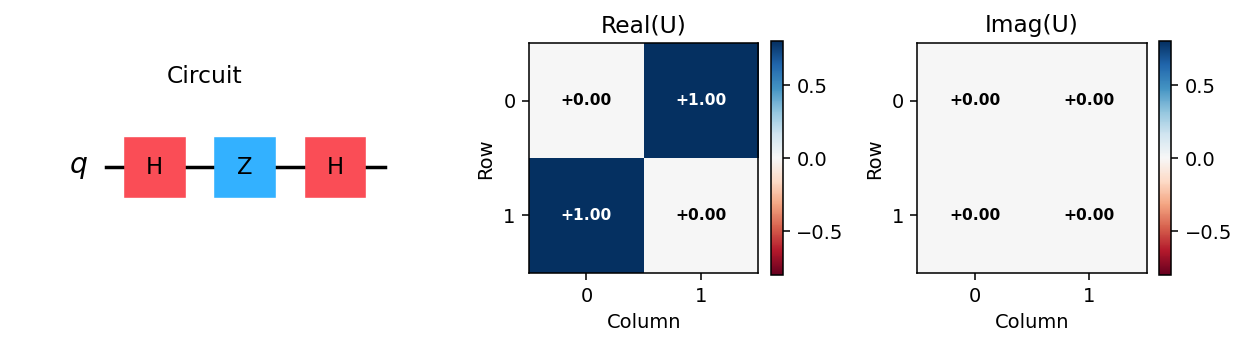

In [ ]:
circuitB = QuantumCircuit(1, name = 'Circuit B')

circuitB.h(0)
circuitB.z(0)
circuitB.h(0)

plot_circuit_unitary_heatmap(circuitB)

### **The Inverse Test** — Confirming Equivalence Mathematically

A unitary matrix has a special property: its **inverse** is also its **conjugate transpose**,  
which means  
$$
U^\dagger U = U U^\dagger = I
$$
where $I$ is the **identity matrix**.

This gives us a powerful way to **test equivalence** between two circuits:

- Let $U_A$ and $U_B$ be the matrices of Circuit A and Circuit B.  
- If the circuits perform the same operation (up to a global phase), then
  $$
  U_A U_B^\dagger \approx I
  $$
- In other words, applying one circuit followed by the **inverse** of the other should bring us **back to the identity**.

Let’s construct a new circuit that applies **Circuit A**, then **Circuit B⁻¹**,  
and visualize its resulting matrix.

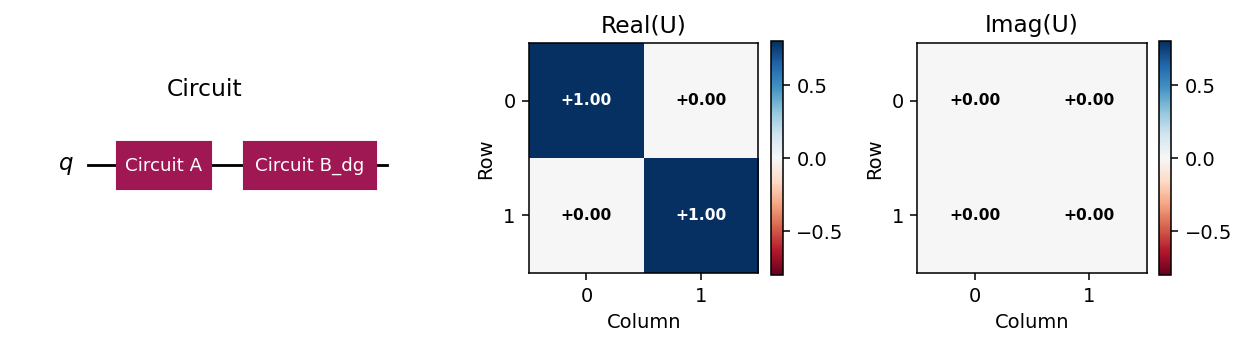

In [ ]:
q = QuantumRegister(1, name = 'q')
circuitC = QuantumCircuit(q, name = 'Circuit C')

circuitC.append(circuitA.to_instruction(), q)
circuitC.append(circuitB.inverse().to_instruction(), q)

plot_circuit_unitary_heatmap(circuitC)

### **Verifying the Result** — It’s the Identity!

As expected, the combined circuit produced the **identity matrix** —  
confirming that $HZH$ is indeed equivalent to $X$ (up to a global phase).

To make this process reusable, let’s now **wrap everything into a function**  
that automatically tests whether two circuits are equivalent.

The function will:

1. Compute the unitaries of both circuits.  
2. Multiply one by the **inverse** of the other.  
3. Compare the result to the **identity matrix** within a small numerical tolerance.

If the deviation is below the threshold, we’ll conclude the two circuits are **equivalent**.

In [ ]:
from qiskit.quantum_info import Operator

def circuits_equivalent(circuitA, circuitB, tol=1e-10):

    circuitA = circuitA.remove_final_measurements(inplace=False)
    circuitB = circuitB.remove_final_measurements(inplace=False)

    n = circuitA.num_qubits

    if circuitB.num_qubits != n:
        raise ValueError("Circuits must act on the same number of qubits.")


    q = QuantumRegister(n, 'q')
    circuitC = QuantumCircuit(q, name='A_then_Binv')

    circuitC.append(circuitA.to_instruction(), q)
    circuitC.append(circuitB.inverse().to_instruction(), q)

    Uc = Operator(circuitC).data
    d = Uc.shape[0]

    err = np.linalg.norm(Uc - np.eye(d), 'fro') / np.sqrt(d)
    if err < tol:
        print("✅ The circuits are equivalent")
    else:
        print(f"❌ The circuits are not equivalent (error = {err:.2e})")

circuits_equivalent(circuitA, circuitB)

✅ The circuits are equivalent


## **Beyond Fixed Rotations**


Until now, all the gates we’ve used performed **fixed 180° rotations** around an axes.  
But what if we want **more granularity** — the ability to rotate the qubit by **any angle we choose**?

The **Rₓ(θ)** gate rotates the qubit’s state **around the X-axis** of the Bloch Sphere by an angle **θ** (in radians).  
This allows for **partial rotations** instead of full flips — giving us finer control over the qubit’s exact position.

Here, we apply **Rₓ(π/4)**, which rotates the qubit **45° around the X-axis**,  
tilting the state vector slightly away from the vertical direction.

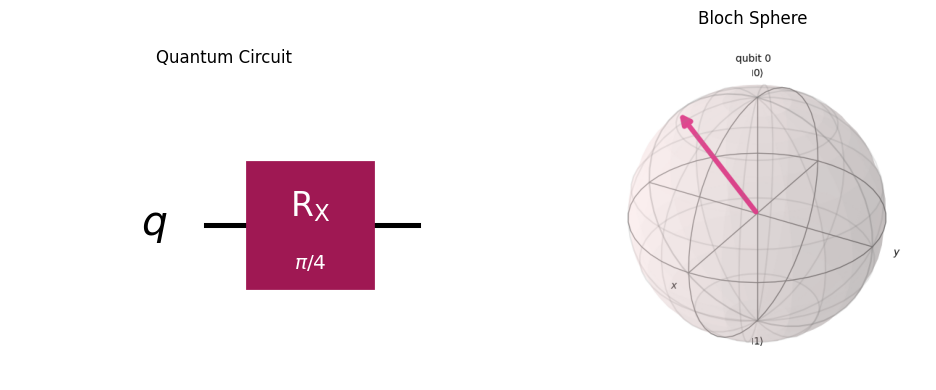

In [ ]:
q = QuantumRegister(1,'q')
qc = QuantumCircuit(q)
qc.rx(pi/4,q)

plot_circuit_sphere(qc)

### **Controlled Rotation Around the Y-Axis** — $R_y(\theta)$

Just like **$R_y(\theta)$** controls rotation around the X-axis, the **$R_y(\theta)$** gate rotates the qubit’s state **around the Y-axis** of the Bloch Sphere by a chosen angle **$\theta$**. Here, we apply **$R_y(\pi/4)$** — a **45° rotation around the Y-axis**

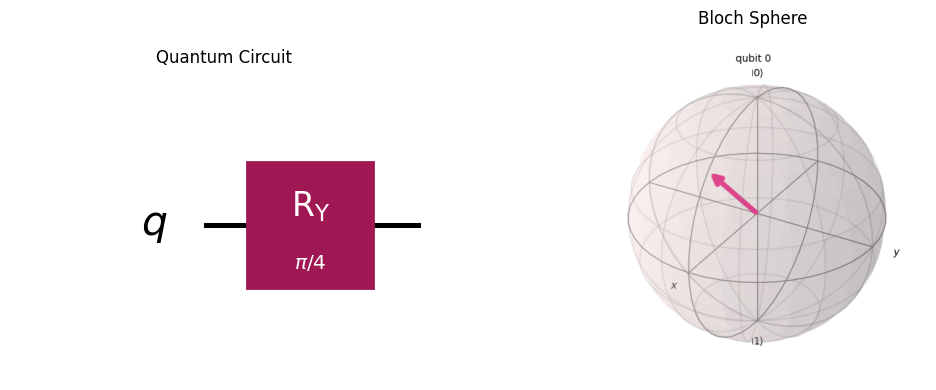

In [ ]:
q = QuantumRegister(1,'q')
qc = QuantumCircuit(q)
qc.ry(pi/4,q[0])


plot_circuit_sphere(qc)

### **Controlled Rotation Around the Z-Axis** — $R_𝓏(\theta)$

Finally, let’s explore the **$R_𝓏(\theta)$** gate, which rotates the qubit’s state **around the Z-axis** of the Bloch Sphere by an angle **$\theta$**.


Let’s apply **$R_𝓏(\pi/4)$** — a 45° rotation around the Z-axis — and see what happens 👇


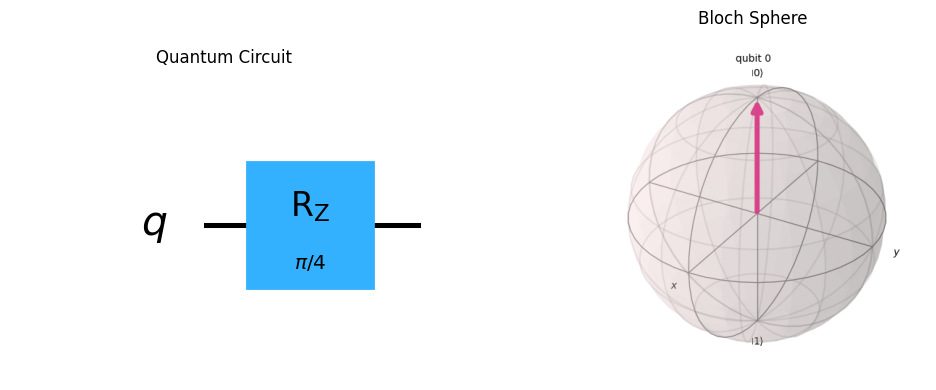

In [ ]:
q = QuantumRegister(1,'q')
qc = QuantumCircuit(q)
qc.rz(pi/4,q[0])


plot_circuit_sphere(qc)

### **Observation**

You might notice that **nothing seems to have changed** on the Bloch Sphere —  
the arrow still points straight up along the Z-axis.

That’s because the qubit was already **aligned with the rotation axis**.  
Rotating around the Z-axis when the qubit is in the **|0⟩ state** only changes its **phase**, which isn’t visible on the Bloch Sphere since the arrow stays in place.

We’ll see later how these **phase changes** become important when combined with other gates or when qubits are **entangled**.


Here we apply all three rotation gates  $R_x$, $R_y$, and $R_z$  each with an angle of $\pi/4$:

After $R_x(\pi/4)$ → the qubit rotates 45° around the X-axis, tilting it diagonally.

After $R_y(\pi/4)$ → the qubit rotates 45° around the Y-axis, moving in a different diagonal direction.

After $R_z(\pi/4)$ → the qubit rotates 45° around the Z-axis, changing its phase (its direction around the vertical axis)

### **Comparing Rotations** — $R_{x}$, $R_{y}$, and $R_{z}$

Now that we’ve explored each individual rotation gate,  
let’s **compare all three** side by side to see how each one affects the qubit’s state.

We’ll build a circuit that sequentially applies:
1. **$R_{x}(\pi/4)$** → rotation around the X-axis  
2. **$R_{y}(\pi/4)$** → rotation around the Y-axis  
3. **$R_{z}(\pi/4)$** → rotation around the Z-axis  

After each gate, we’ll capture and visualize the resulting **statevector** on a **Bloch Sphere**.  
This gives us a clear picture of how the qubit moves through space with each type of rotation.


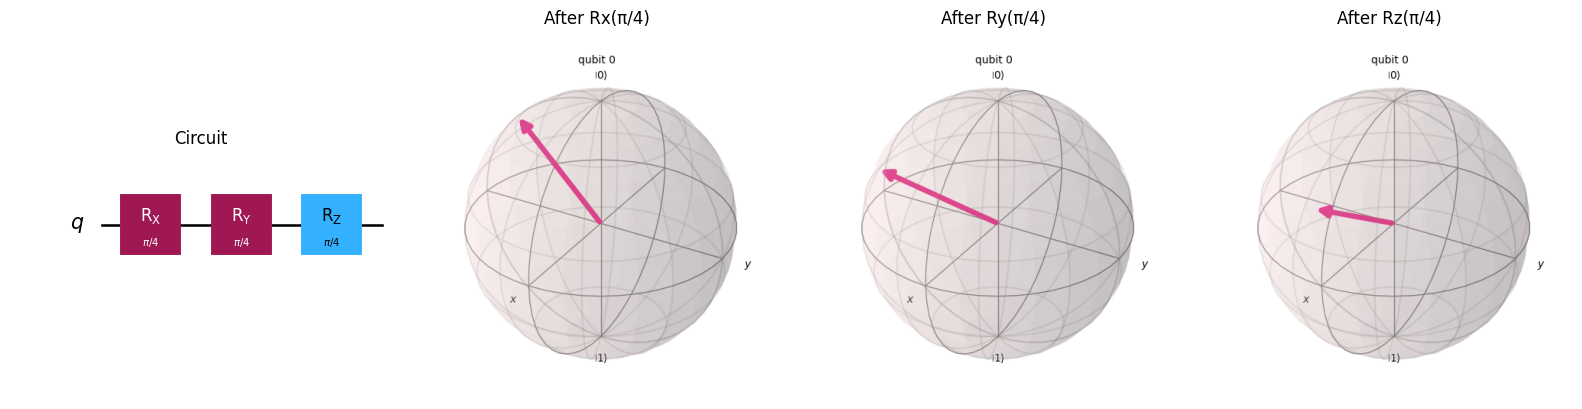

In [ ]:
# --- define circuit and gates (edit here if you want different gates) ---
q = QuantumRegister(1, 'q')
qc = QuantumCircuit(q)
gates = [
    ("Rx(π/4)", lambda c: c.rx(pi/4, 0)),
    ("Ry(π/4)", lambda c: c.ry(pi/4, 0)),
    ("Rz(π/4)", lambda c: c.rz(pi/4, 0)),
]

# --- build circuit and capture state after each gate ---
states, labels = [], []
running = QuantumCircuit(q)  # accumulator circuit
for label, apply_gate in gates:
    apply_gate(qc)           # for final drawing
    apply_gate(running)      # for intermediate state
    states.append(Statevector(running))
    labels.append(label)

# --- plot: circuit + one Bloch per intermediate state ---
cols = 1 + len(states)
fig, axes = plt.subplots(1, cols, figsize=(4*cols, 4))

# left: circuit
qc.draw('mpl', ax=axes[0])
axes[0].set_title('Circuit')

# right: Bloch spheres after each gate
for i, (sv, lbl) in enumerate(zip(states, labels), start=1):
    bf = plot_bloch_multivector(sv)
    bf.canvas.draw()
    img = np.asarray(bf.canvas.buffer_rgba())
    plt.close(bf)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f'After {lbl}')

plt.tight_layout()
plt.show()

### **The Universal Single-Qubit Gate** — $U(\theta, \phi, \lambda)$

Up to now, we’ve seen that the rotation gates **$R_x(\theta)$**, **$R_y(\theta)$**, and **$R_z(\theta)$** allow us to rotate a qubit around specific axes by a chosen angle.  
But in practical quantum programming, it’s often useful to have **one general gate** that can represent **any possible single-qubit rotation**.

That’s where the **U gate** comes in.

---

####  **Motivation**

Instead of separately chaining Rₓ, Rᵧ, and R𝓏 gates, Qiskit defines a **universal rotation gate**, written as:

$
U(\theta, \phi, \lambda) =
\begin{bmatrix}
\cos\!\left(\tfrac{\theta}{2}\right) & -e^{i\lambda}\sin\!\left(\tfrac{\theta}{2}\right) \\
e^{i\phi}\sin\!\left(\tfrac{\theta}{2}\right) & e^{i(\phi+\lambda)}\cos\!\left(\tfrac{\theta}{2}\right)
\end{bmatrix}
$

This represents the **most general single-qubit unitary transformation** (up to a global phase).  
In other words, **any possible single-qubit operation** can be expressed using this single formula.

---

#### **Decomposition**

The U gate can be written as a sequence of rotations around the **Z–Y–Z** axes:

$
U(\theta, \phi, \lambda) = R_z(\phi)\,R_y(\theta)\,R_z(\lambda)
$

This decomposition shows that the U gate **encapsulates all rotation gates** —  
a key insight for understanding how **quantum compilers optimize circuits** by merging multiple rotations into one.

---

#### **Special Cases**

Certain choices of parameters correspond to well-known gates:

| Gate | Parameters $U(\theta, \phi, \lambda)$ | Equivalent |
|------|---------------------------------------|-------------|
| **X** | $U(\pi, 0, \pi)$ | Pauli-X (bit flip) |
| **Z** | $U(0, 0, \pi)$ | Pauli-Z (phase flip) |
| **H** | $U(\tfrac{\pi}{2}, 0, \pi)$ | Hadamard |

---

The **U gate** is therefore the **foundation of all single-qubit operations** in Qiskit — and a powerful abstraction that lets quantum compilers, optimizers, and hardware backends express any rotation efficiently.


## **From Quantum States to Classical Results** — Measurement

So far, we’ve been visualizing qubit states continuously on the Bloch Sphere.  
But in a real quantum computer, we can’t directly "see" that state — we can only **measure** it.

When a qubit is measured, its **quantum state collapses** into one of the classical outcomes:  
**|0⟩ or |1⟩**, with probabilities determined by its position on the Bloch Sphere.

Here, we create a simple circuit that:
1. Applies a **Hadamard gate** to put the qubit in a superposition  
2. Measures the qubit and stores the result in a **classical bit**

Let’s visualize the circuit below 👇


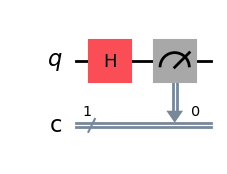

In [ ]:

q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')
qc = QuantumCircuit(q,c)
qc.h(q[0])
qc.measure(q[0], c[0])
qc.draw('mpl')

### **Theoretical Probabilities Before Measurement**

Before running the circuit on a simulator, we can use the **statevector** to calculate  
the **theoretical probabilities** of each possible outcome.

Since the Hadamard gate creates an **equal superposition**,  
we expect both outcomes — **|0⟩** and **|1⟩** — to have **equal probability (50%)**.

Let’s confirm that using Qiskit’s `Statevector` class.


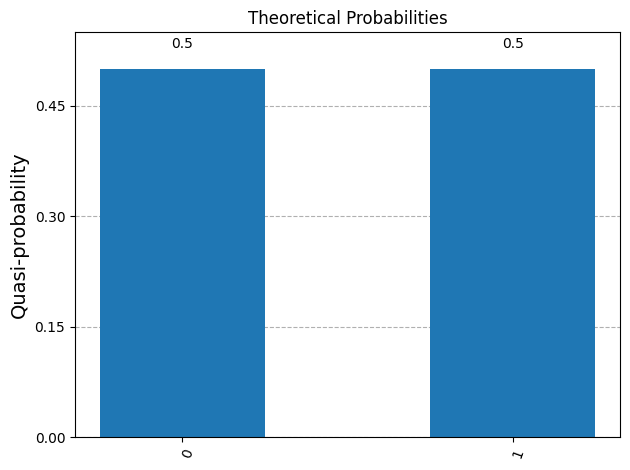

In [ ]:
psi = Statevector.from_instruction(qc.remove_final_measurements(inplace=False))
plot_histogram(psi.probabilities_dict(), title='Theoretical Probabilities')

### **Simulating the Measurement Process**

Now let’s run the circuit on Qiskit’s **AerSimulator**, which mimics how a real quantum computer would behave.  
We’ll execute the circuit **10,000 times (shots)** and record how often each result occurs.

The histogram below shows the actual **measurement counts** —  
you should see roughly half of the results as **0** and half as **1**,  
reflecting the **probabilistic nature of quantum measurement**.


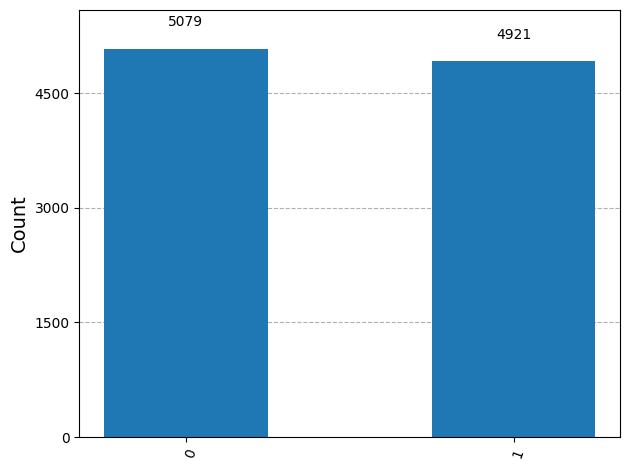

In [ ]:
job = backend.run(qc, shots=10000)
result = job.result()
count = result.get_counts()
plot_histogram(count)

### **Self-Exercise** — The $|-\rangle$ State

As a self-exercise, try preparing the $|-\rangle$ state instead of $|+\rangle$  
and observe what happens when you measure it.


### **Two-Qubit Operations** — The CNOT (CX) Gate

Until now, we’ve only worked with single qubits.  
Let’s move on to **two-qubit gates**, which allow qubits to **interact** — the foundation of entanglement and quantum logic.

The **CNOT (Controlled-NOT)** gate, or **CX gate**, is one of the most fundamental two-qubit operations.

It works as follows:
- The **first qubit** acts as the **control**.  
- The **second qubit** is the **target**.  
- The target qubit flips (|0⟩ ↔ |1⟩) **only if** the control qubit is |1⟩.

Here, we apply a CX gate to the initial state **|00⟩** and measure both qubits.


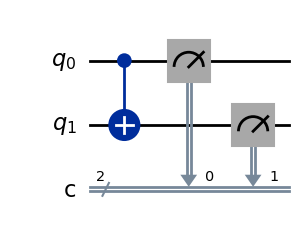

In [ ]:
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
qc = QuantumCircuit(q,c)
qc.cx(q[0],q[1])
qc.measure(q,c)
qc.draw('mpl')

Let's run the simulation and see the results.

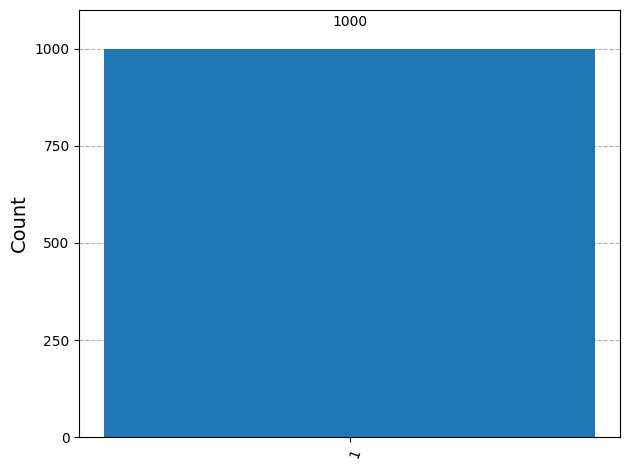

In [ ]:
job = backend.run(qc, shots=1000)
result = job.result()
count = result.get_counts()
plot_histogram(count)

### **Observation and Exercise**

When starting from **|00⟩**, the control qubit is 0,  
so the target qubit is never flipped — the outcome remains **|00⟩** in every shot.

---

**Try it yourself:**  
Experiment with **different starting states** for the two qubits and observe how the **CNOT gate** behaves in each case.



##💡 **Hint:**  
To encode a `1` on any qubit, apply an **X gate** before the CNOT.

Try all four possible input combinations — **|00⟩**, **|01⟩**, **|10⟩**, and **|11⟩** —  
and see how the results change in the measurement histogram.

##💡 **Pro Tip:**  
You can do the otherway around (controling multiple qubits) in a clean way as

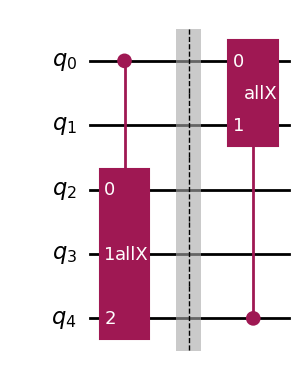

In [ ]:

def allX(n):

  q = QuantumRegister(n, 'q')

  circuit = QuantumCircuit(q, name='allX')

  circuit.x(q)

  return circuit


q = QuantumRegister(5, "q")

circuit = QuantumCircuit(q)

circuit.append(allX(3).to_gate().control(1), [q[0]]+q[2:5])

circuit.barrier()

circuit.append(allX(2).to_gate().control(1), [q[4]]+q[0:2])

circuit.draw('mpl')

The above is a visual representtion to "if qubit q is 1, activate the gates in the subcircuit. Lets decompose it and see

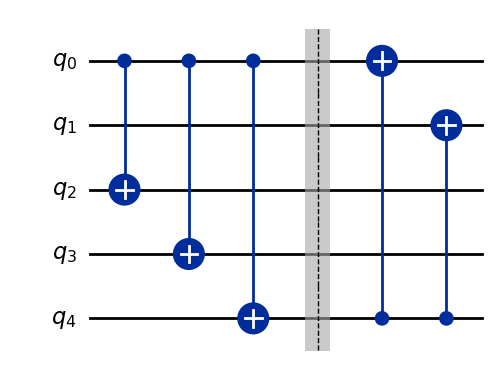

In [ ]:
circuit.decompose().draw('mpl')

## **Self-Exercise** - What if the subcircuit had other gates? or control gates?  


## **Creating Entanglement** — H + CX

So far, we’ve seen how the **CNOT gate** behaves when both qubits start in definite states.  
Now let’s see what happens when we introduce **superposition** into the mix.

We’ll begin with both qubits in **|00⟩** and then:

1. **Apply a Hadamard gate** to the first (control) qubit.  
   After this step, the first qubit has a **50% chance of being 0** and a **50% chance of being 1**.  
   The system is now in a superposition of **|00⟩ and |10⟩**.

2. **Apply a CNOT gate**, where the first qubit controls the second.  
   - When the control qubit is **0**, the target qubit stays **0**.  
   - When the control qubit is **1**, the target qubit flips to **1**.

So, half the time both qubits remain **|00⟩**,  
and half the time they become **|11⟩**.


Let’s run the circuit and see if the results confirm this prediction 👇


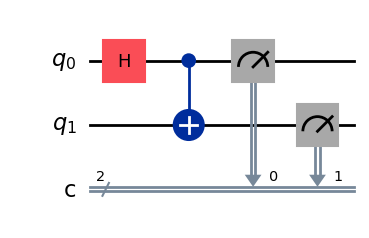

In [ ]:
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
qc = QuantumCircuit(q,c)
qc.h(q[0])
qc.cx(q[0],q[1])
qc.measure(q,c)
qc.draw('mpl')

Let's run the simulation and see the results.

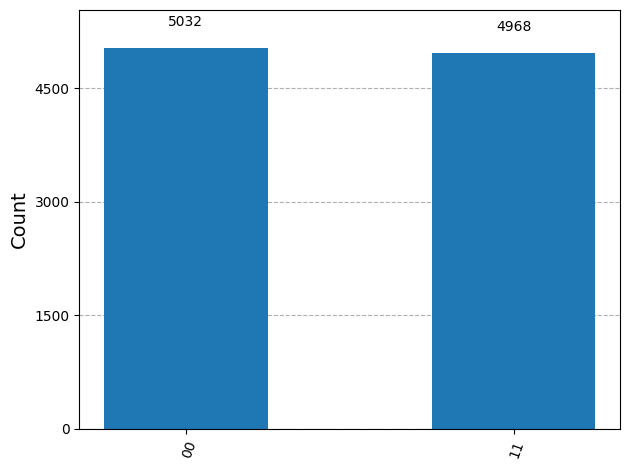

In [ ]:
job = backend.run(qc, shots=10000)
result = job.result()
count = result.get_counts()
plot_histogram(count)

### 🎉 **Congratulations!**

You’ve just simulated **quantum entanglement**!

The results show roughly equal probabilities for **|00⟩** and **|11⟩**,  
and none for **|01⟩** or **|10⟩** — meaning the two qubits are now **entangled**.  

If one is measured as 0, the other will **always** be 0.  
If one is 1, the other will **always** be 1.

This special two-qubit state is known as the **Bell state** —  
one of the most fundamental examples of **entanglement** in quantum computing.


## **Multi-Control Gates** — The Toffoli (CCX) Gate

We’ve seen how a single control qubit can influence another using the **CNOT** gate.  
Now let’s move one step further with **multi-control gates**, starting with the **Toffoli gate** — also known as **CCX**.

The **Toffoli gate** has two control qubits and one target.  
It flips the target **only when both controls are |1⟩**.  
This is a key building block for reversible logic and many quantum algorithms.


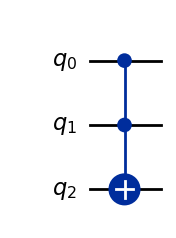

In [ ]:
q = QuantumRegister(3, 'q')
qc = QuantumCircuit(q)
qc.ccx(q[0],q[1],q[2])
qc.draw('mpl')

### **Under the Hood**

Although we can call `ccx` directly, hardware can’t apply it as one physical gate.  
Under the hood, it must be **decomposed** into a sequence of simpler operations —  
single-qubit rotations and **CX (CNOT)** gates.

Let’s unpack the circuit to see what it really looks like.


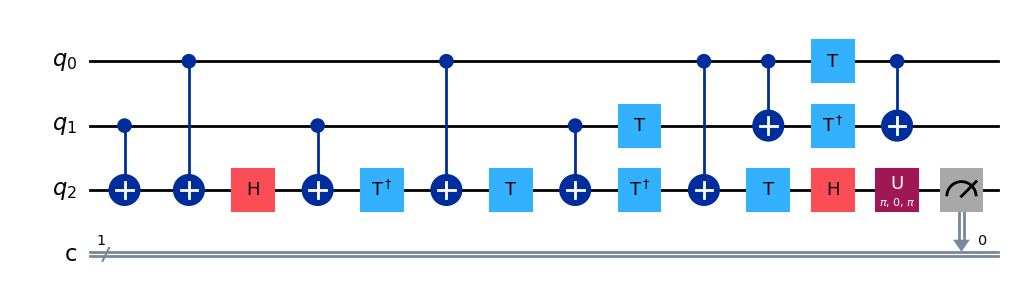

In [ ]:
qc = qc.decompose()
qc.draw('mpl')

## **Measuring Circuit Complexity** — The Cost Function

To analyze how “expensive” a circuit is, we’ll define a simple **cost function**.  
This will help us quantify how different implementations compare.

Since **CNOT gates** are typically **much noisier and slower** than single-qubit gates,  
we’ll count each one as *ten times more costly*.

Our cost model will therefore be:

$
\text{Cost} = (\text{number of single-qubit gates}) + 10 \times (\text{number of CNOTs})
$

Let’s define a function to compute this cost for any circuit.


In [ ]:
def unroll_circuit(qc):

  # Translate circuit to 'u' and 'cx' basis
  target_basis = ['u', 'cx']

  pm = PassManager([
      UnrollCustomDefinitions(SEL, target_basis),
      BasisTranslator(SEL, target_basis)
  ])

  unrolled = pm.run(qc)

  return unrolled

def circuit_cost(qc):

    unrolled = unroll_circuit(qc)

    # Count operations
    ops = unrolled.count_ops()
    num_u  = ops.get('u', 0)
    num_cx = ops.get('cx', 0)

    # Define a simple cost model
    total_cost = num_u + num_cx * 10

    # Print summary
    print(f"Total cost: {total_cost} (u: {num_u}, cx: {num_cx})")

circuit_cost(qc)


Total cost: 69 (u: 9, cx: 6)


## **Scaling Up** — Multi-Controlled Gates

The **Toffoli (CCX)** gate is just the simplest case of a **multi-controlled X gate (MCX)**.  
For example, a 4-control MCX gate flips its target **only if all four control qubits are 1**.

Let’s construct such a gate and visualize it.


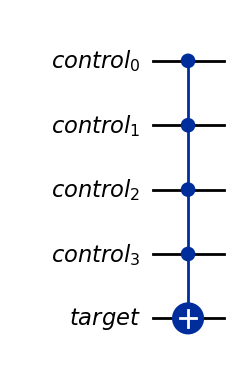

In [ ]:
n = 4
q_control = QuantumRegister(n, 'control')
q_target = QuantumRegister(1, 'target')

qc = QuantumCircuit(q_control,q_target)
qc.mcx(q_control, q_target)
qc.draw('mpl')

### **Decomposition Again**

Just like the CCX, a multi-controlled gate must be broken down  
into basic operations supported by real quantum hardware.  
Let’s decompose the circuit once to see what it becomes internally.


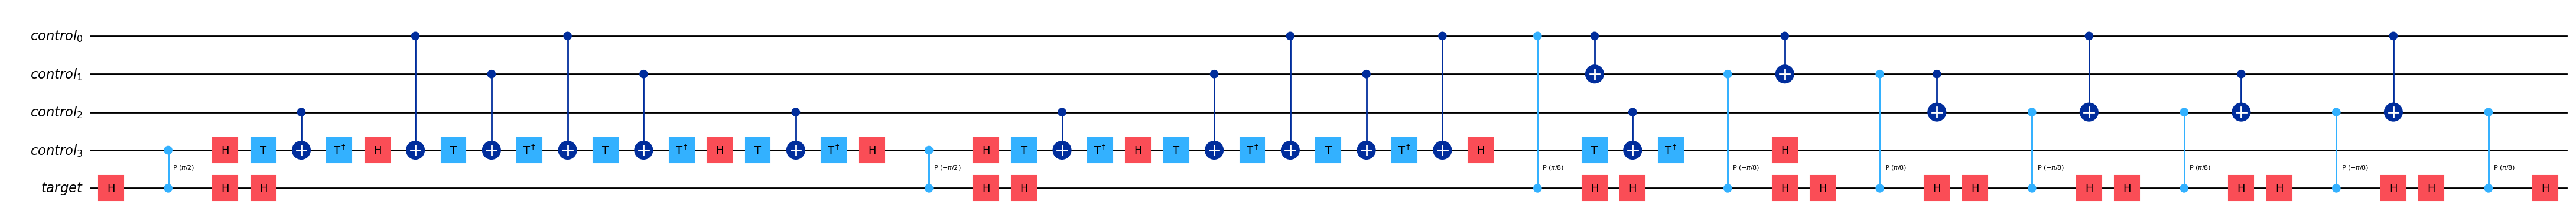

In [ ]:
qc.decompose().draw('mpl', fold=-1)

### **Evaluating the Cost**

Now we can use our cost function to estimate how expensive this decomposed circuit is.  
This gives us a quick way to compare different implementations in terms of  
gate count and the number of CNOTs.


In [ ]:
circuit_cost(qc)

Total cost: 429 (u: 69, cx: 36)


### **Different Implementation Modes**

Qiskit provides several **MCX implementations**, each with trade-offs between  
**depth**, **ancilla qubits**, and **CNOT count**.

Let’s explore a few of these modes:

- **'basic'** → straightforward decomposition; requires multiple ancilla qubits.  
- **'noancilla'** → uses no extra qubits, but circuit depth is large.  
- **'v-chain'** and **'v-chain-dirty'** → efficient depth, uses ancillae as temporary workspace.  
- **'recursion'** → a balanced recursive construction using minimal ancillae.

Each mode achieves the same logical effect, but with different hardware trade-offs.


/tmp/ipython-input-2690218035.py:20: DeprecationWarning: ``qiskit.circuit.quantumcircuit.QuantumCircuit.mcx()``'s argument ``mode`` is deprecated as of Qiskit 2.1. It will be removed no earlier than 3 months after the release date. Instead, add a generic MCXGate to the circuit and specify the synthesis method via the ``hls_config`` in the transpilation. Alternatively, specific decompositions are available at https://qisk.it/mcx.
  qc.mcx(q_control, q_target, q_ancilla, mode=mode)


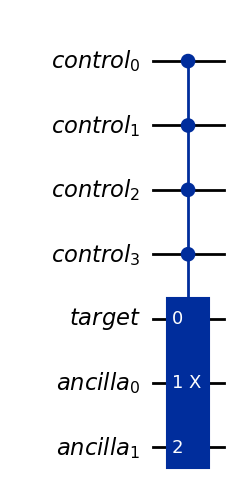

In [ ]:
n = 4
q_control = QuantumRegister(n, 'control')
q_target = QuantumRegister(1, 'target')

qc = QuantumCircuit(q_control,q_target)

# choose mode: 'noancilla', 'basic', 'recursion', 'v-chain', or 'v-chain-dirty'
mode = 'basic'

match mode:
    case 'basic' | 'v-chain' | 'v-chain-dirty':
        q_ancilla = QuantumRegister(n - 2, 'ancilla')
    case 'recursion':
        q_ancilla = QuantumRegister(1, 'ancilla')
    case 'noancilla':
        q_ancilla = []

qc.add_register(q_ancilla)

qc.mcx(q_control, q_target, q_ancilla, mode=mode)
qc.draw('mpl')


### **Visualizing the Decomposition**

Let’s decompose the chosen mode to see its internal gate structure.  
This will give us a clear picture of how complexity changes with each approach.


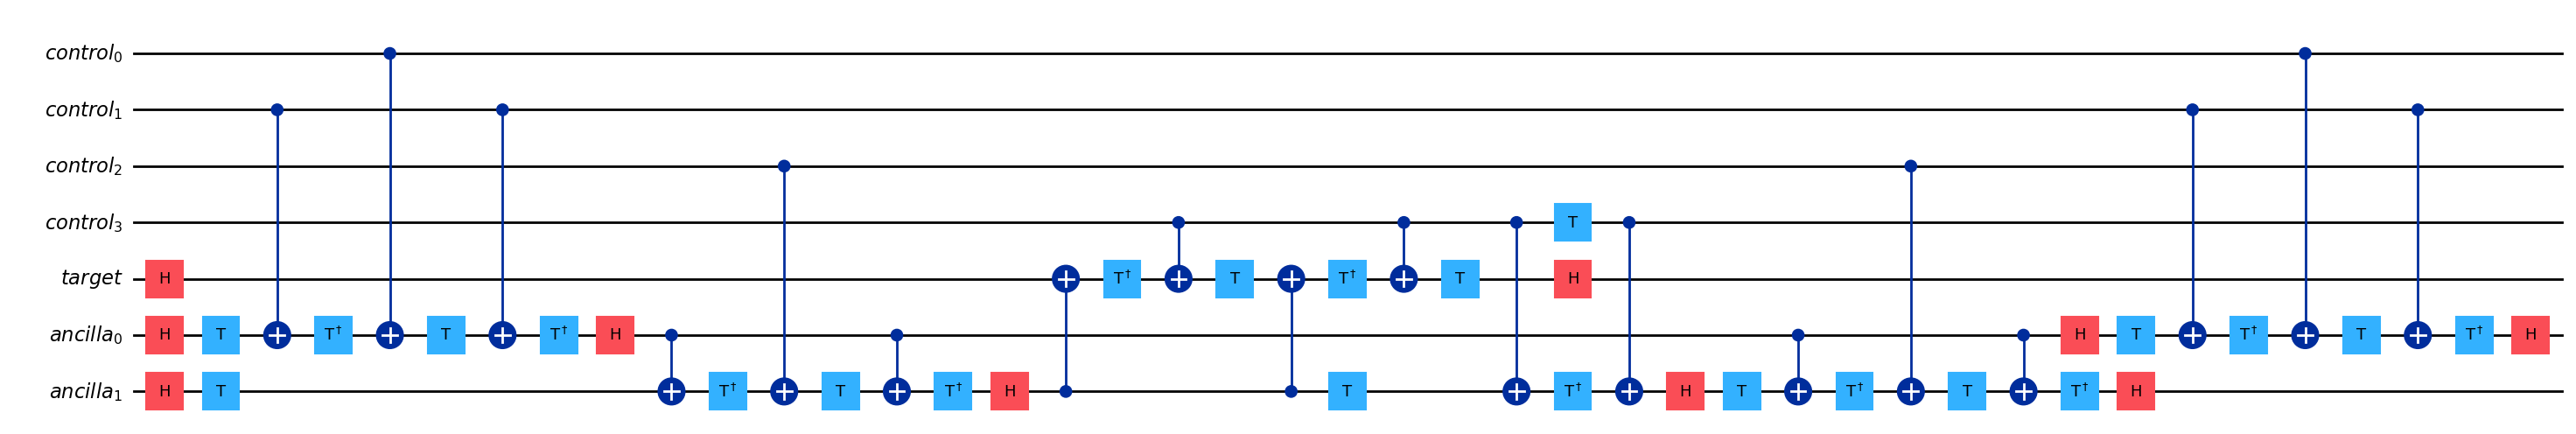

In [ ]:
qc = qc.decompose(reps=2)
qc.draw('mpl', fold=-1)

### **Comparing Implementation Costs**

Finally, let’s compute the **cost** of the chosen implementation.  
By experimenting with different modes, you can see how the trade-off plays out:

- Fewer **ancilla qubits** → higher **depth** (more gates).  
- More **ancilla qubits** → lower **depth** but greater hardware requirements.  

This type of cost analysis is an essential step in **quantum circuit optimization**,  
helping us choose the most efficient design for a given hardware constraint.


In [ ]:
circuit_cost(qc)

Total cost: 213 (u: 33, cx: 18)


## **From Classical to Quantum Logic Gates**

Now that we understand multi-qubit gates and how to measure quantum circuits,  
let’s start building **classical logic operations** using **quantum gates**.  

Our goal is to eventually construct a **quantum full adder**,  
so we’ll first look at how basic classical gates can be represented in quantum form.


### **The Quantum NOT Gate** -  (X Gate)

In classical logic, the **NOT gate** inverts its input:

<table>
  <tr>
    <td>
      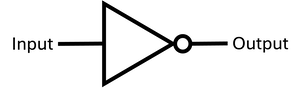
    </td>
    <td>
      <table align="center">
        <tr>
          <th align="center">Input</th>
          <th align="center">Output</th>
        </tr>
        <tr><td align="center">0</td><td align="center">1</td></tr>
        <tr><td align="center">1</td><td align="center">0</td></tr>
      </table>
    </td>
  </tr>
</table>

We have already seen that the quantum equivalent of this is the **X gate**,  
which flips the qubit state from **|0⟩ → |1⟩** or **|1⟩ → |0⟩**,  
just like the classical NOT operation.


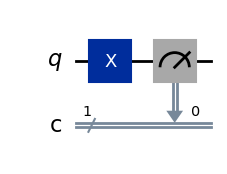

In [ ]:
# Create a Quantum Circuit with 1 quantum register and 1 classical register
q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')
qc = QuantumCircuit(q,c)
qc.x(q)
qc.measure(q, c)    # Map the quantum measurement to the classical bits
qc.draw('mpl')

### **The Quantum AND Gate** (CCX or Toffoli Gate)

The **AND** gate outputs 1 **only if both inputs are 1**.

As we have seen before, in quantum computing, the equivalent behavior can be achieved using  
the **Toffoli gate (CCX)**, which has two control qubits and one target qubit.  
The target qubit flips **only when both controls are |1⟩**,  
matching the behavior of the classical AND gate.


<table>
  <tr>
    <td>
      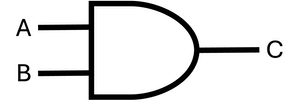
    </td>
    <td>
      <table align="center">
        <tr>
          <th colspan="2" align="center">Input</th>
          <th align="center">Output</th>
        </tr>
        <tr>
          <th align="center" >A</th>
          <th align="center">B</th>
          <th align="center">C</th>
        </tr>
        <tr><td align="center">0</td><td align="center">0</td><td align="center">0</td></tr>
        <tr><td align="center">0</td><td align="center">1</td><td align="center">0</td></tr>
        <tr><td align="center">1</td><td align="center">0</td><td align="center">0</td></tr>
        <tr><td align="center">1</td><td align="center">1</td><td align="center">1</td></tr>
      </table>
    </td>
  </tr>
</table>


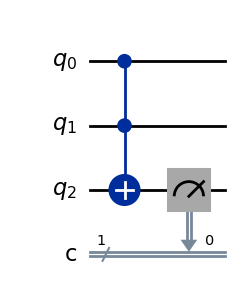

In [ ]:
q = QuantumRegister(3, 'q')
c = ClassicalRegister(1, 'c')
qc = QuantumCircuit(q,c)
qc.ccx(q[0], q[1], q[2])
qc.measure(q[2], c[0])
qc.draw('mpl')

### **The Quantum NAND Gate**

The **NAND gate** is the inverse of the **AND** gate.  
It outputs 0 **only** when both inputs are 1 — otherwise, it outputs 1.

To create this using quantum gates,  
we take the **CCX (AND)** circuit and apply an additional **X gate**  
on the target qubit to flip the output.

<table>
  <tr>
    <td>
      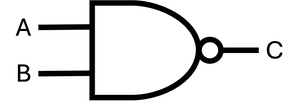
    </td>
    <td>
      <table align="center">
        <tr>
          <th colspan="2" align="center">Input</th>
          <th align="center">Output</th>
        </tr>
        <tr>
          <th align="center" >A</th>
          <th align="center">B</th>
          <th align="center">C</th>
        </tr>
        <tr><td align="center">0</td><td align="center">0</td><td align="center">1</td></tr>
        <tr><td align="center">0</td><td align="center">1</td><td align="center">1</td></tr>
        <tr><td align="center">1</td><td align="center">0</td><td align="center">1</td></tr>
        <tr><td align="center">1</td><td align="center">1</td><td align="center">0</td></tr>
      </table>
    </td>
  </tr>
</table>



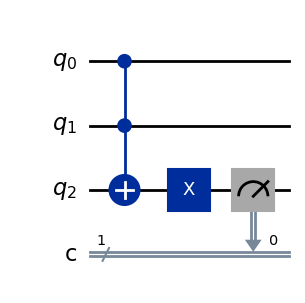

In [ ]:
q = QuantumRegister(3, 'q')
c = ClassicalRegister(1, 'c')
qc = QuantumCircuit(q,c)
qc.ccx(q[0], q[1], q[2])
qc.x(q[2])
qc.measure(q[2], c[0])
qc.draw('mpl')

### **The Quantum OR Gate**

Next, we’ll build the **OR** gate, which outputs 1 if **either** of its inputs is 1.  
In classical logic:

<table>
  <tr>
    <td>
      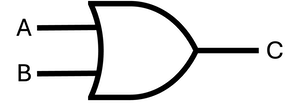
    </td>
    <td>
      <table align="center">
        <tr>
          <th colspan="2" align="center">Input</th>
          <th align="center">Output</th>
        </tr>
        <tr>
          <th align="center" >A</th>
          <th align="center">B</th>
          <th align="center">C</th>
        </tr>
        <tr><td align="center">0</td><td align="center">0</td><td align="center">0</td></tr>
        <tr><td align="center">0</td><td align="center">1</td><td align="center">1</td></tr>
        <tr><td align="center">1</td><td align="center">0</td><td align="center">1</td></tr>
        <tr><td align="center">1</td><td align="center">1</td><td align="center">1</td></tr>
      </table>
    </td>
  </tr>
</table>


To achieve this in a quantum circuit, we combine **CNOT** and **CCX** gates.  
The CNOTs handle single-input activations, while the CCX covers the joint (A=1, B=1) case.


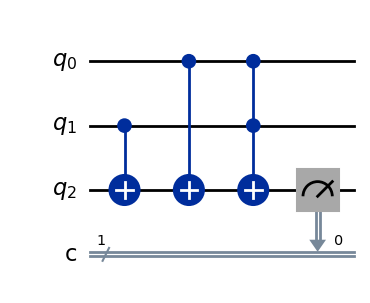

In [ ]:
q = QuantumRegister(3, 'q')
c = ClassicalRegister(1, 'c')
qc = QuantumCircuit(q,c)

qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.ccx(q[0], q[1], q[2])
qc.measure(q[2], c[0])
qc.draw('mpl')

### **The Quantum XOR Gate**

The **XOR (exclusive OR)** gate outputs 1 **only when exactly one input is 1**.

<table>
  <tr>
    <td>
      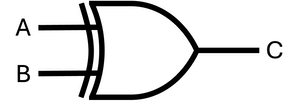
    </td>
    <td>
      <table align="center">
        <tr>
          <th colspan="2" align="center">Input</th>
          <th align="center">Output</th>
        </tr>
        <tr>
          <th align="center" >A</th>
          <th align="center">B</th>
          <th align="center">C</th>
        </tr>
        <tr><td align="center">0</td><td align="center">0</td><td align="center">0</td></tr>
        <tr><td align="center">0</td><td align="center">1</td><td align="center">1</td></tr>
        <tr><td align="center">1</td><td align="center">0</td><td align="center">1</td></tr>
        <tr><td align="center">1</td><td align="center">1</td><td align="center">0</td></tr>
      </table>
    </td>
  </tr>
</table>


In quantum logic, this can be implemented using **two CNOT gates** —  
one from each input qubit to the same target qubit.


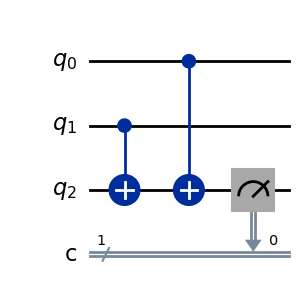

In [ ]:
q = QuantumRegister(3, 'q')
c = ClassicalRegister(1, 'c')
qc = QuantumCircuit(q,c)
qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.measure(q[2], c[0])
qc.draw('mpl')

### **The Quantum NOR Gate**

Finally, the **NOR** gate outputs 1 **only when both inputs are 0**.  
It’s the inverse of the OR gate.

To create it, we start with the **quantum OR** circuit  
and add an **X gate** at the end to invert the result.

<table>
  <tr>
    <td>
      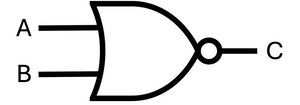
    </td>
    <td>
      <table align="center">
        <tr>
          <th colspan="2" align="center">Input</th>
          <th align="center">Output</th>
        </tr>
        <tr>
          <th align="center" >A</th>
          <th align="center">B</th>
          <th align="center">C</th>
        </tr>
        <tr><td align="center">0</td><td align="center">0</td><td align="center">1</td></tr>
        <tr><td align="center">0</td><td align="center">1</td><td align="center">0</td></tr>
        <tr><td align="center">1</td><td align="center">0</td><td align="center">0</td></tr>
        <tr><td align="center">1</td><td align="center">1</td><td align="center">0</td></tr>
      </table>
    </td>
  </tr>
</table>



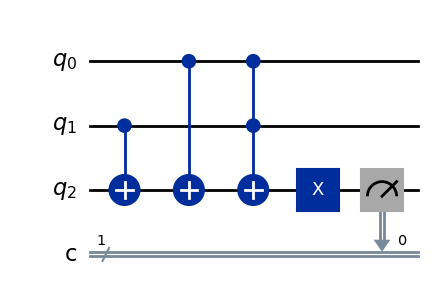

In [ ]:
q = QuantumRegister(3, 'q')
c = ClassicalRegister(1, 'c')
qc = QuantumCircuit(q,c)

qc.cx(q[1], q[2])
qc.cx(q[0], q[2])
qc.ccx(q[0], q[1], q[2])
qc.x(q[2])
qc.measure(q[2], c[0])
qc.draw('mpl')

### **Summary**

We’ve now recreated several classical logic gates using quantum operations:

| Classical Gate | Quantum Equivalent | Notes |
|----------------|--------------------|-------|
| NOT | X | Flips a single qubit |
| AND | CCX | Two controls, one target |
| NAND | CCX + X | Inverted AND |
| OR | CX + CCX | Combines single and double control |
| XOR | Two CXs | Exclusive OR behavior |
| NOR | OR + X | Inverted OR |

These building blocks will allow us to construct a **quantum full adder**,  
combining quantum superposition with classical logic relationships.


## **The Half Adder** — From Classical to Quantum

Now that we’ve explored the quantum versions of classical logic gates,  
it’s time to combine them into something more powerful — the **Half Adder**.

---

### What is a Half Adder?

A **Half Adder** performs single-bit binary addition with two inputs (**A** and **B**)  
and produces two outputs:

- **SUM (S)** → The result of A ⊕ B  
- **CARRY (C)** → The result of A ⋅ B  

<table>
  <tr>
    <td>
      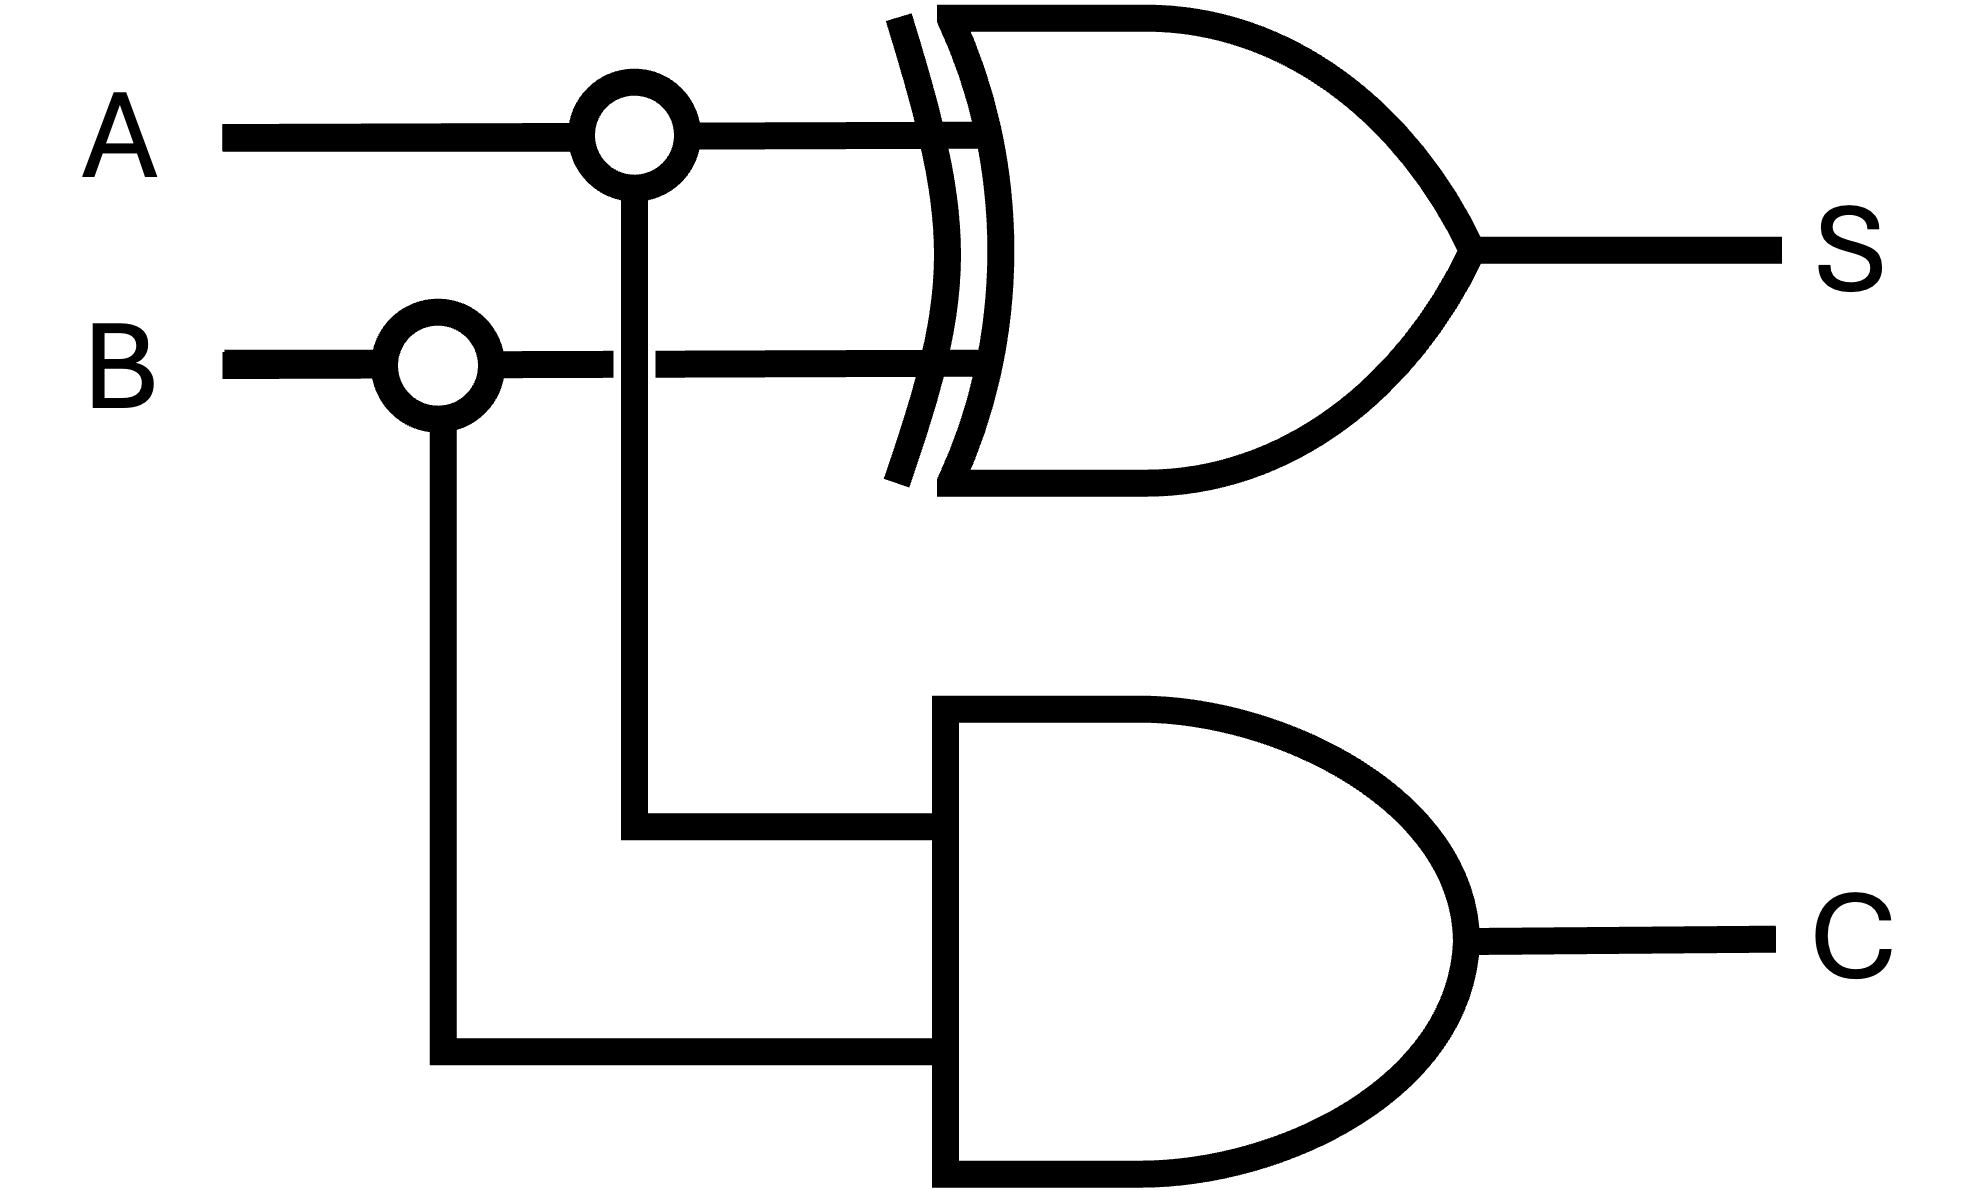
    </td>
    <td>
      <table align="center">
        <tr>
          <th colspan="2" align="center">Input</th>
          <th colspan="2" align="center">Output</th>
        </tr>
        <tr>
          <th align="center" >A</th>
          <th align="center">B</th>
          <th align="center">S</th>
          <th align="center">C</th>
        </tr>
        <tr><td align="center">0</td><td align="center">0</td><td align="center">0</td><td align="center">0</td></tr>
        <tr><td align="center">0</td><td align="center">1</td><td align="center">1</td><td align="center">0</td></tr>
        <tr><td align="center">1</td><td align="center">0</td><td align="center">1</td><td align="center">0</td></tr>
        <tr><td align="center">1</td><td align="center">1</td><td align="center">0</td><td align="center">1</td></tr>
      </table>
    </td>
  </tr>
</table>

---

Assume you have the **classical circuit diagram** above.  
Your task is to **translate it into a quantum circuit** that produces the same truth table.  
Fill in the missing implementation section in the code cell below to complete the **quantum Half Adder**.


### **Task**: Half Adder Function (Quantum-Only Version)

Write a function **`half_adder()`** that:

- Returns a **quantum circuit** representing a generic Half Adder.  
- The circuit should be **purely quantum**, without any measurement operations.  
- The **first two qubits** in the circuit must represent the **input bits A and B**, respectively.  
- The **last two qubits** in the circuit must represent the **output qubits**:
  - The second to last qubit should represent the **sum (S)**.  
  - The last qubit should represent the **carry (C)**.  

The function should return the completed **quantum circuit** implementing the half adder logic.


In [ ]:
def half_adder():
  ""   ""



In [ ]:

def test_half_adder(circuit):
   ""  ""


In [ ]:
circuit_cost(circuit)

Total cost: 50 (u: 0, cx: 5)


In [ ]:
def half_adder():
    "" ""

In [ ]:
test_half_adder(circuit)

In [ ]:
circuit_cost(circuit)

Total cost: 50 (u: 0, cx: 5)


## **Full-adder** — From Classical to Quantum

Now that we’ve mastered the Half Adder,
let’s move to the Full Adder, which can handle carry bits from previous additions.

What is a Full Adder?

A Full Adder performs single-bit binary addition with three inputs:

A → First bit

B → Second bit

C_in → Carry input from the previous addition

and produces two outputs:

SUM (S) → The result of A ⊕ B ⊕ C_in

CARRY (C_out) → The carry bit resulting from the addition

<table>
  <tr>
    <td>
      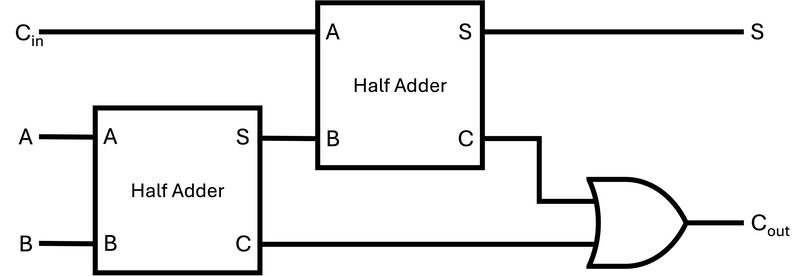
    </td>
    <td>
      <table align="center">
        <tr>
          <th colspan="3" align="center">Input</th>
          <th colspan="2" align="center">Output</th>
        </tr>
        <tr>
          <th align="center">A</th>
          <th align="center">B</th>
          <th align="center">C<sub>in</sub></th>
          <th align="center">S</th>
          <th align="center">C<sub>out</sub></th>
        </tr>
        <tr><td align="center">0</td><td align="center">0</td><td align="center">0</td><td align="center">0</td><td align="center">0</td></tr>
        <tr><td align="center">0</td><td align="center">0</td><td align="center">1</td><td align="center">1</td><td align="center">0</td></tr>
        <tr><td align="center">0</td><td align="center">1</td><td align="center">0</td><td align="center">1</td><td align="center">0</td></tr>
        <tr><td align="center">0</td><td align="center">1</td><td align="center">1</td><td align="center">0</td><td align="center">1</td></tr>
        <tr><td align="center">1</td><td align="center">0</td><td align="center">0</td><td align="center">1</td><td align="center">0</td></tr>
        <tr><td align="center">1</td><td align="center">0</td><td align="center">1</td><td align="center">0</td><td align="center">1</td></tr>
        <tr><td align="center">1</td><td align="center">1</td><td align="center">0</td><td align="center">0</td><td align="center">1</td></tr>
        <tr><td align="center">1</td><td align="center">1</td><td align="center">1</td><td align="center">1</td><td align="center">1</td></tr>
      </table>
    </td>
  </tr>
</table>

### **Task**: Full Adder Function (Quantum-Only Version)

Write a function **`full_adder()`** that:

- Returns a **quantum circuit** representing a generic Full Adder.  
- The circuit should be **purely quantum**, with no measurement operations.  
- The **first three qubits** in the circuit must represent the **input bits**:
  - **A** → first qubit  
  - **B** → second qubit  
  - **Carry-in (Cin)** → third qubit  
- The **last two qubits** in the circuit must represent the **output qubits**:
  - The **second to last** should represent the **sum (S)**.  
  - The **last** should represent the **carry-out (Cout)**.  

The function should return the completed **quantum circuit** implementing the full adder logic.


In [ ]:
def full_adder():
  "" ""

### **Testing the Full Adder Implementation**

Now that we’ve built our **quantum full adder**, let’s put it to the test!  
We’ll run the circuit for **all possible input combinations (A, B, Cin)** and verify that the resulting outputs — **SUM** and **CARRY** — match the expected classical truth table.

In [ ]:
def test_full_adder(circuit):
   "" ""

In [ ]:
circuit_cost(circuit)

AttributeError: 'NoneType' object has no attribute 'qubits'

## **Take Home Challenge!**

Now that we’ve mastered the **1-bit full adder**, it’s time to take things to the next level.  
Your challenge is to implement a **quantum n-bit adder circuit** that can add **any two n-bit binary numbers**.

### **Requirements**

Create a function `nbit_adder(n)` that returns a circuit with the following properies:
- The circuit must **add two n-bit numbers** represented by qubit registers.  
- Use the **first n qubits** to represent the first number (**a₀ … aₙ₋₁**).  
- Use the **next n qubits** to represent the second number (**b₀ … bₙ₋₁**).  
- Use the **final (n + 1) qubits** to store the result (**s₀ … sₙ**).
- The first bits (a₀, b₀ and s₀) are the least significant bits.


### **Helper Function**
 — Encoding Classical Numbers into Quantum States

Before tackling the full **n-bit adder**, we need a convenient way to **encode classical binary numbers** into qubits.  
The following helper function `encode_num()` does exactly that:

- It takes a **bit string** such as `'110'` and creates a **quantum circuit** that prepares qubits in the corresponding state.  
- You can optionally specify `n` to **pad** the input with leading zeros.  
- The bits are automatically **reversed** to match the little-endian convention used in Qiskit (least significant bit first).  

This makes it easy to load binary numbers into qubit registers for arithmetic operations like addition.

In [ ]:
# this returns an adder circuit which takes two bit strings, a full-adder subcircuit and returns the full adder circuit
def encode_num(a, n = None):

    "" ""

In [ ]:
def nbit_adder(n):

    "" ""

### **Quantum Adder Validation**

In [ ]:
def nbit_adder_test(circuit):

  "" ""

In [ ]:
circuit_cost(circuit)

AttributeError: 'NoneType' object has no attribute 'qubits'